<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Preprocessing_dataset_antoine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Missing values

## Récupération datasets

In [2]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
import numpy as np

!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [3]:
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv
     

--2023-05-15 12:13:04--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-15 12:13:05 (15.4 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-15 12:13:05--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [4]:


df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')
     


# On détermine les colonnes qui ont des données manquantes


In [5]:
df_test_inputs.columns[df_test_inputs.isnull().any()].tolist()


['OP100_Capuchon_insertion_mesure']

In [6]:
df_training_inputs.columns[df_training_inputs.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

In [7]:
df_training_output.columns[df_training_output.isnull().any()].tolist()

[]

In [ ]:

print("NaN of OP100_Capuchon_insertion_mesure in training = ", df_training_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )
print("NaN of OP100_Capuchon_insertion_mesure in test = ", df_test_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )

NaN of OP100_Capuchon_insertion_mesure in training =  18627
NaN of OP100_Capuchon_insertion_mesure in test =  4360


<Axes: >

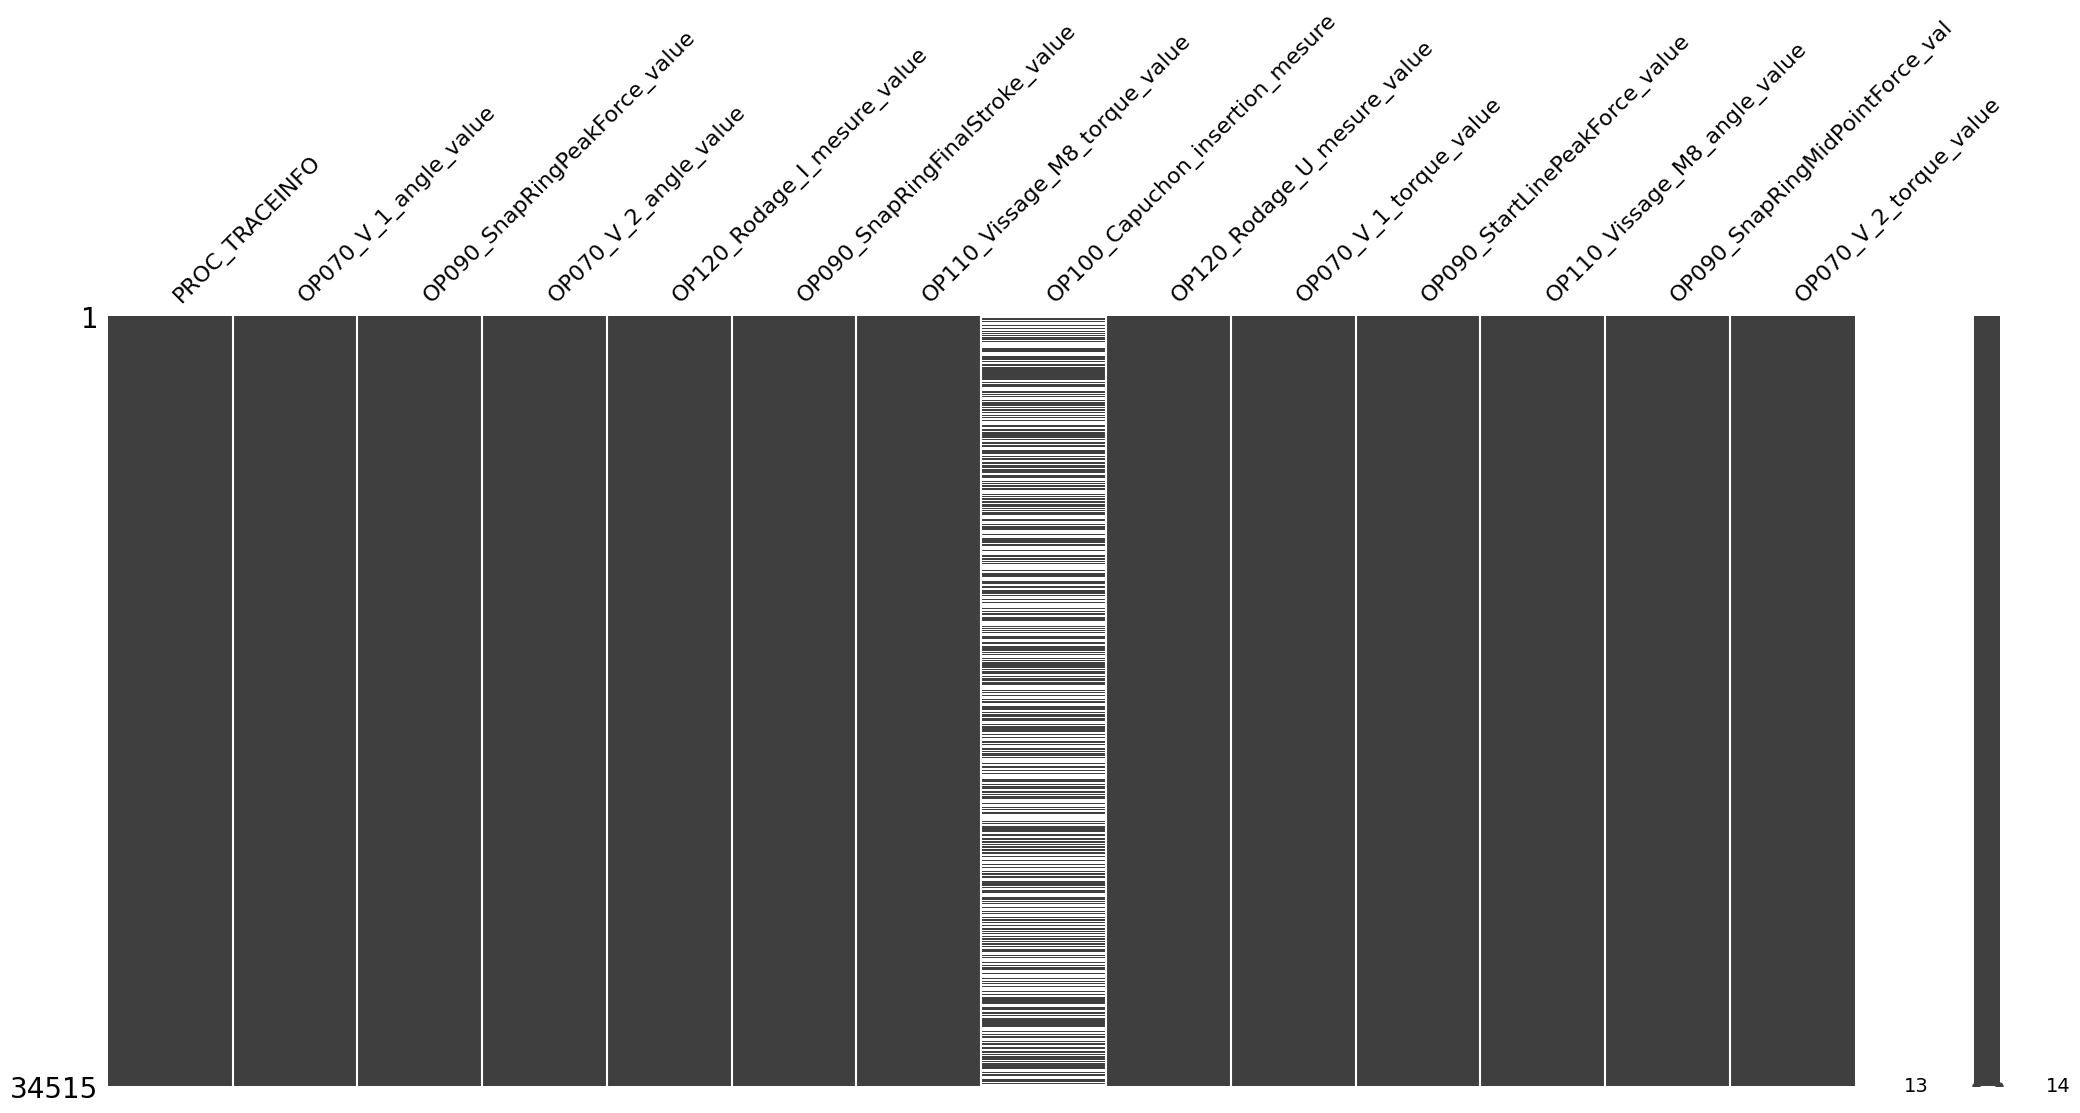

In [10]:
msno.matrix(df_training_inputs)

<Axes: >

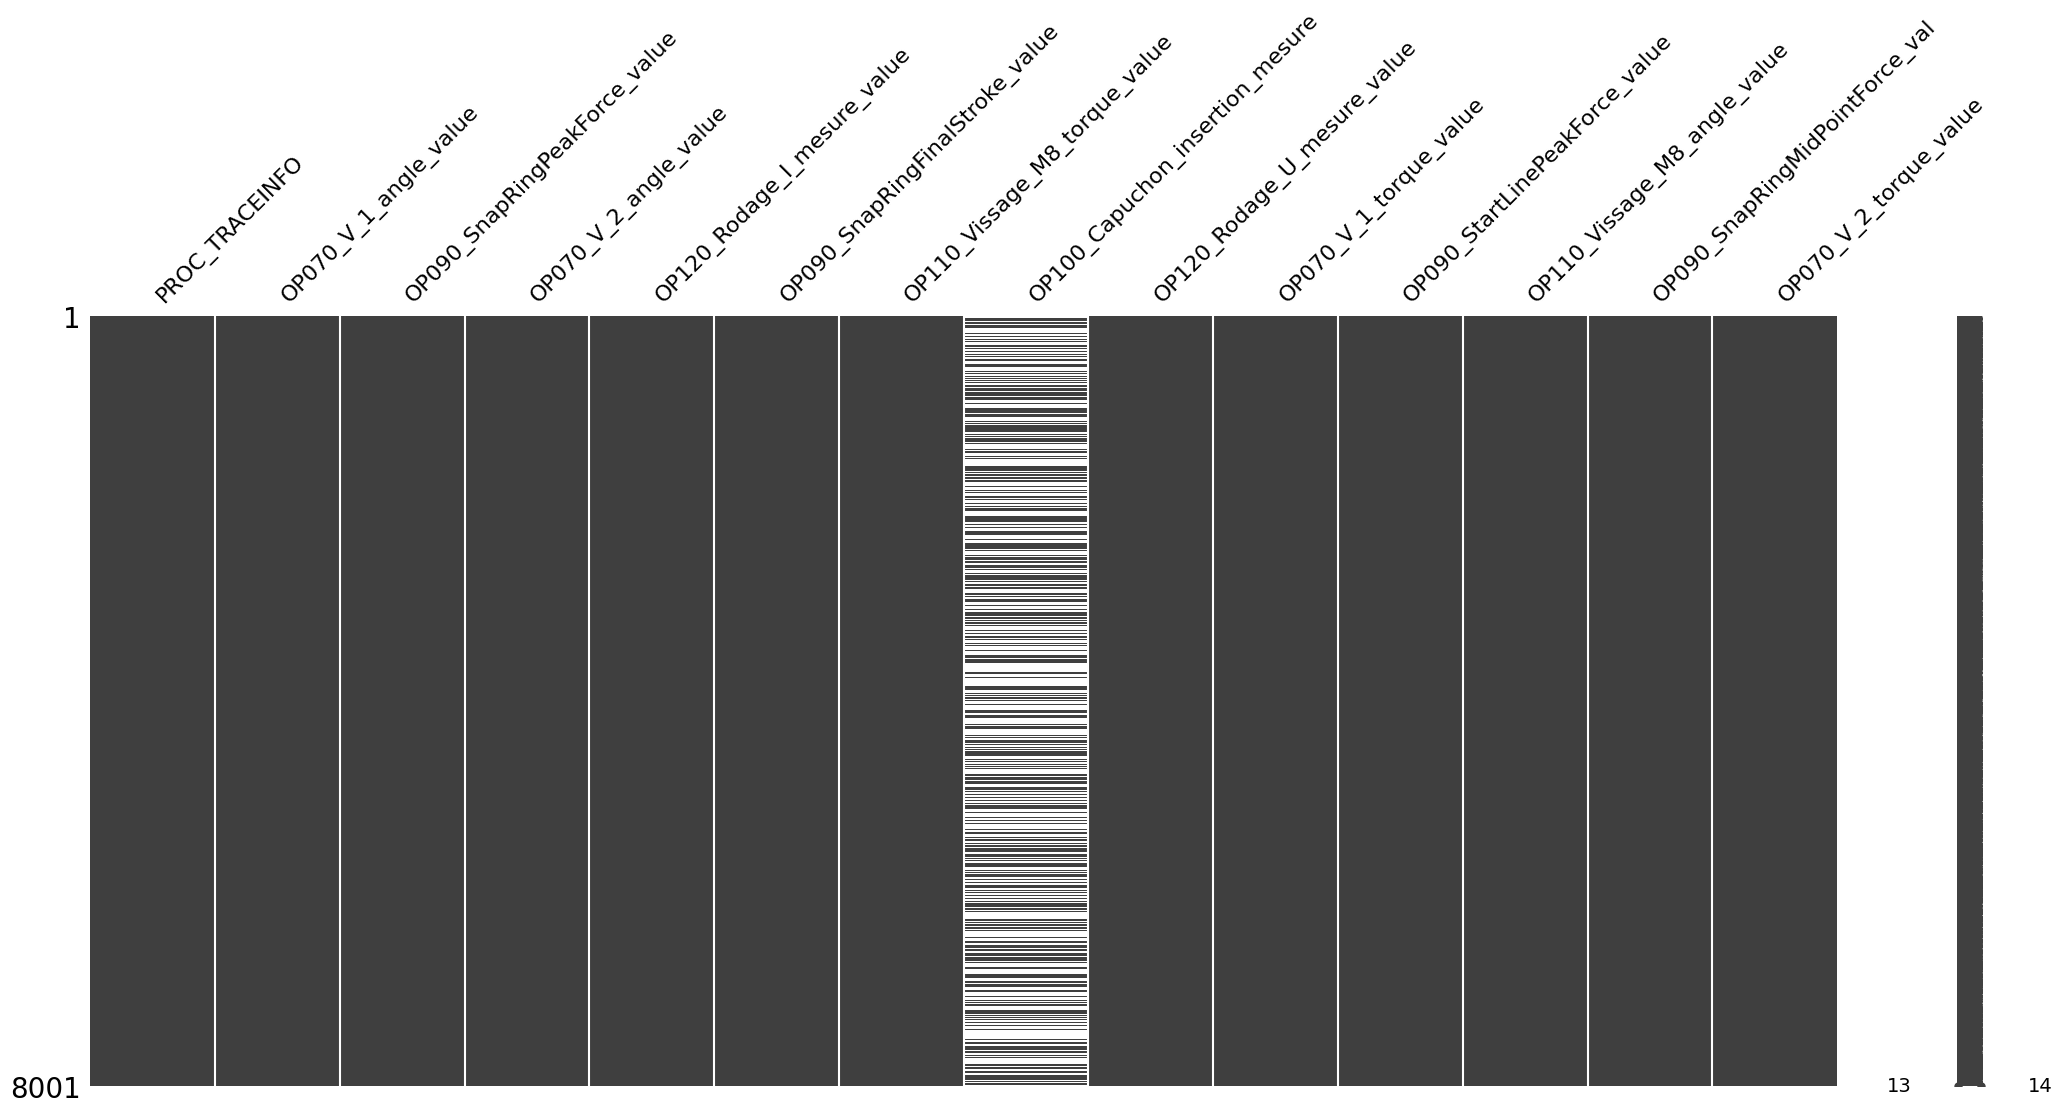

In [13]:
msno.matrix(df_test_inputs)

Stratégie 1: Supprimer l'unique colonne avec des valeurs manquantes

In [14]:
df_training_inputs_cleaned = df_training_inputs.drop(colomns=["OP100_Capuchon_insertion_mesure"])
df_test_inputs_cleaned = df_test_inputs.drop(colomns=["OP100_Capuchon_insertion_mesure"])

TypeError: ignored